m = 0.08095556999999994
b = 0.22459507850000004
n = -0.0809555699999999
c = 0.08697060950000013
Actual = 0.17279028 -- Prediction = 0.1719739580000001
Actual = 0.17279028 -- Adjustment= 0.13959173000000005
Actual = 0.1634392 -- Prediction = 0.1638784010000001
Actual = 0.1634392 -- Adjustment= 0.14768728700000006
Actual = 0.15498788 -- Prediction = 0.1557828440000001
Actual = 0.15498788 -- Adjustment= 0.15578284400000003
Actual = 0.14732953 -- Prediction = 0.1476872870000001
Actual = 0.14732953 -- Adjustment= 0.163878401
Actual = 0.14036733 -- Prediction = 0.1395917300000001
Actual = 0.14036733 -- Adjustment= 0.17197395800000004


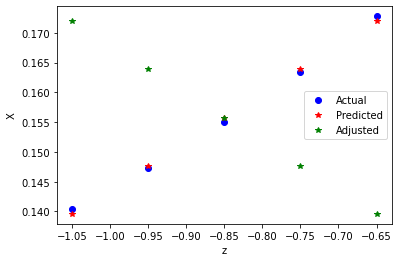

In [32]:
# predicting x based on z
import numpy as np
import matplotlib.pyplot as mplt
import scipy

x_conc_arr = np.array((0.17279028, 0.1634392,  0.15498788, 0.14732953, 0.14036733))
z_arr = np.array((-0.65, -0.75, -0.85, -0.95, -1.05))
vol_arr = np.array((1.40815998e-14, 1.48872703e-14, 1.56990562e-14, 1.65151107e-14,
 1.73342576e-14))
# increasing x causes volume to increase linearly
# decreasing z causes volume to increase linearly

mplt.plot(z_arr, x_conc_arr, 'bo', label = "Actual")

m,b = np.polyfit(z_arr, x_conc_arr,1)

def predict_x(z,m,b):
    # x = m.z +b
    
    x = z*m +b
    return x

reverse_x_conc_arr = np.flip(x_conc_arr,0)

n,c = np.polyfit(z_arr, reverse_x_conc_arr,1)

def adjust_x(z,n,c):
    #reflect about y=x
    # x = nz+c
    x = n*z +c
    return x

print("m = " + str(m))
print("b = " + str(b))
print("n = " + str(n))
print("c = " + str(c))
predict_arr = []
adjust_arr = []
for i in range(len(z_arr)):
    prediction = predict_x(z_arr[i],m,b)
    print("Actual = "+str(x_conc_arr[i])+" -- Prediction = "+ str(prediction))
    predict_arr.append(prediction)
    adjustment = adjust_x(z_arr[i],n,c)
    print("Actual = "+str(x_conc_arr[i])+" -- Adjustment= "+ str(adjustment))
    adjust_arr.append(adjustment)
    
mplt.plot(z_arr, predict_arr, "r*", label="Predicted")
mplt.plot(z_arr, adjust_arr, "g*", label="Adjusted")
mplt.xlabel("z")
mplt.ylabel("X")

mplt.legend()


o = -10759473340793.512
d = 0.03816464160798604
Linear R² = 0.9954883837909994
[0.07367487142329418, 0.07930945509633314, 0.0849868077834965, 0.09069401359779646, 0.09642284659907983]
exponential R² = 0.9986661420710717


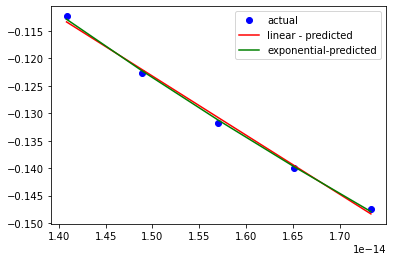

In [50]:
# predicting volume with xz and not just predicting x
import scipy.optimize

x_arr = np.array((0.17279028, 0.1634392,  0.15498788, 0.14732953, 0.14036733))
z_arr = np.array((-0.65, -0.75, -0.85, -0.95, -1.05))
vol_arr = np.array((1.40815998e-14, 1.48872703e-14, 1.56990562e-14, 1.65151107e-14,
 1.73342576e-14))
xz_arr = x_arr*z_arr

mplt.plot(vol_arr, xz_arr,'bo',label = "actual" )

o,d = np.polyfit(vol_arr, xz_arr,1)

print("o = " + str(o))
print("d = " + str(d))

def calc_xz(vol, o,d):
    # xz = vol*o +d
    xz= vol*o +d
    return xz
    
predict_xz_arr = []
for i in range(len(vol_arr)):
    predict_xz_arr.append(calc_xz(vol_arr[i],o,d))

predict_xz_arr = np.array(predict_xz_arr)
# determine quality of the fit
squaredDiffs = np.square(xz_arr - predict_xz_arr)
squaredDiffsFromMean = np.square(xz_arr - np.mean(xz_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"Linear R² = {rSquared}")
    
mplt.plot(vol_arr, predict_xz_arr, 'r-', label = "linear - predicted")


chosen_vol = 1.56990562e-14
chosen_z = -0.65

def calc_x(z,vol,o,d):
    xz = calc_xz(vol,o,d)
    x = xz*z
    return x

predicted_x = calc_x(chosen_z,chosen_vol,o,d)

predict_x_arr = []
for i in range(len(vol_arr)):
    predict_x_arr.append(calc_x(chosen_z, vol_arr[i],o,d))

print(predict_x_arr)


def monoExp(x, m, t, b):
    return m * np.log(t * x) + b

############## 
# plotting an exponential line of best fit
p0 = (40200525428561.67, .1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, vol_arr, xz_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(xz_arr - monoExp(vol_arr, m, t, b))
squaredDiffsFromMean = np.square(xz_arr - np.mean(xz_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"exponential R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(vol_arr[i], m, t, b) for i in range(len(vol_arr))]

mplt.plot(vol_arr, y_curve_arr,"g-",label="exponential-predicted")
mplt.legend()

In [ ]:
# New theory --> we need to keep osmolarity difference constant to ensure the volume stays the same

osm_i = na + k + cl + x

